In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import os
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from collections import Counter 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dfmerge = pd.read_csv("/content/gdrive/My Drive/finalmerge.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
dfmerge.describe()

,Unnamed: 0_x,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Unnamed: 0_y,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
count,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06
mean,2.201694e+05,2.515150e+00,2.016494e+03,6.544028e+00,1.576547e+01,1.318193e+03,1.999537e-01,1.297760e+03,1.398036e+01,1.273796e+04,1.273937e+04,1.475983e+03,1.476221e+03,2.089705e-01,1.423142e+01,3.691335e+02,1.254870e+01,1.885540e+02,1.456484e+02,2.630467e-01,9.501128e+00,1.016012e+03,4.168825e+01,4.946636e+01,1.688418e+01,6.604433e+01,6.476720e+01,6.210289e+01,1.476221e+03,3.673489e+02,1.230411e+01,1.865897e+02,1.462245e+02,2.550000e-01,9.418141e+00,1.016167e+03,4.280911e+01,4.934882e+01,1.661847e+01,6.527912e+01,6.387153e+01,6.345448e+01,1.297760e+03
std,1.449516e+05,1.104474e+00,4.999603e-01,3.396029e+00,8.790736e+00,5.166970e+02,3.999654e-01,5.026491e+02,4.148781e+01,1.354192e+03,1.356409e+03,5.528555e+02,5.348307e+02,4.065734e-01,4.142203e+01,2.110346e+02,6.471354e+00,8.603604e+01,6.990671e+01,1.004745e+00,1.722554e+00,6.315331e+00,3.932331e+01,1.611147e+01,9.024073e+00,1.710963e+01,1.893322e+01,2.252080e+01,5.348307e+02,2.110373e+02,6.508047e+00,8.698118e+01,6.996480e+01,9.781583e-01,1.861534e+00,6.315904e+00,3.971353e+01,1.615241e+01,8.993893e+00,1.715484e+01,1.906687e+01,2.245897e+01,5.026491e+02
min,0.000000e+00,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.039700e+04,1.039700e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.810000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00
25%,9.091400e+04,2.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00,9.040000e+02,0.000000e+00,9.000000e+02,0.000000e+00,1.129800e+04,1.129800e+04,1.059000e+03,1.100000e+03,0.000000e+00,0.000000e+00,1.860000e+02,8.000000e+00,1.240000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.600000e+01,5.400000e+01,4.700000e+01,1.100000e+03,1.840000e+02,7.000000e+00,1.200000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,5.300000e+01,4.800000e+01,9.000000e+02
50%,2.067500e+05,3.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,1.314000e+03,0.000000e+00,1.300000e+03,0.000000e+00,1.289200e+04,1.289200e+04,1.523000e+03,1.500000e+03,0.000000e+00,0.000000e+00,3.710000e+02,1.200000e+01,1.970000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.300000e+01,5.200000e+01,1.500000e+01,6.700000e+01,6.700000e+01,6.600000e+01,1.500000e+03,3.690000e+02,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.500000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.600000e+01,6.700000e+01,1.300000e+03
75%,3.458240e+05,3.000000e+00,2.017000e+03,9.000000e+00,2.300000e+01,1.736000e+03,0.000000e+00,1.700000e+

Selecting Feature columns as x

In [46]:
X=dfmerge.drop([
               
                "ArrTime",
                 "Unnamed: 0_x",
                 "Unnamed: 0_y",
                 "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",],axis=1)
X


,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,ArrDel15,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
0,1,2016,1,1,741.0,0.0,700,0.0,14747,12478,1600,0.0,8.0,22,255,113,0.0,10,1015,0,32,26,41,32,74
1,1,2016,1,1,705.0,0.0,700,0.0,14747,12892,900,0.0,0.0,12,31,113,0.0,10,1020,2,30,15,51,47,46
2,1,2016,1,1,658.0,0.0,700,3.0,14747,12892,900,0.0,0.0,12,31,113,0.0,10,1020,2,30,15,51,47,46
3,1,2016,1,1,723.0,0.0,700,6.0,14747,12478,1500,0.0,4.0,21,254,113,0.0,10,1016,0,33,24,42,33,74
4,1,2016,1,1,726.0,0.0,700,0.0,14747,12892,1000,0.0,3.0,10,39,113,0.0,10,1020,9,29,13,53,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815400,3,2017,9,18,2240.0,0.0,2200,0.0,12478,12892,200,0.0,0.0,5,220,113,0.0,10,1012,1,70,6,74,74,87
1815401,3,2017,9,21,2358.0,1.0,2200,73.0,12478,12892,200,1.0,51.0,11,179,143,0.0,10,1010,56,63,12,65,65,91
1815402,3,2017,9,22,2240.0,0.0,2200,0.0,12478,12892,200,0.0,0.0,10,135,113,0.0,10,1010,3,59,12,67,67,75
1815403,3,2017,9,23,2146.0,0.0,2100,3.0,12478,12892,100,0.0,0.0,6,202,113,0.0,10,1009,4,61,8,68,68,80


In [0]:
Y=dfmerge["ArrDel15"]
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = None) 

In [48]:
Y_train.value_counts()

0.0    1005148
1.0     265635
Name: ArrDel15, dtype: int64

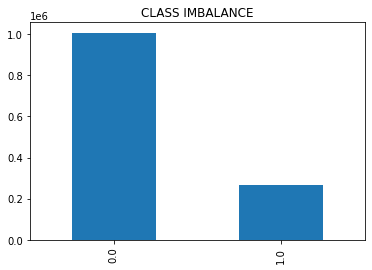

In [49]:
Y_train.value_counts().plot(kind='bar', title='CLASS IMBALANCE');


In [0]:
newX_train=X_train[X_train['ArrDel15'] == 1.0]
newX_test=X_test[X_test['ArrDel15'] == 1.0]


**new x,y train test for pipeline** <br />
**y contains arrDelayMinutes**

In [0]:
newX_train=newX_train.drop(['ArrDel15'],axis=1)
newX_test=newX_test.drop(['ArrDel15'],axis=1)


In [58]:
newY_train=newX_train[newX_train['ArrDelayMinutes'] > 0.0]
newY_test=newX_test[newX_test['ArrDelayMinutes'] > 0.0]

newY_train=newY_train['ArrDelayMinutes']
                       
newY_test=newY_test['ArrDelayMinutes']

newY_test

707033      65.0
960381     115.0
164771      16.0
556488      27.0
938374      53.0
           ...  
1318004     20.0
1541764     15.0
972991      15.0
282150      27.0
1718693    126.0
Name: ArrDelayMinutes, Length: 113731, dtype: float64

In [0]:
newX_train=newX_train.drop(['ArrDelayMinutes'],axis=1)
newX_test=newX_test.drop(['ArrDelayMinutes'],axis=1)


In [60]:
Y_test

707033     1.0
1384272    0.0
305177     0.0
1124729    0.0
553906     0.0
          ... 
197967     0.0
1733188    0.0
522636     0.0
959045     0.0
729727     0.0
Name: ArrDel15, Length: 544622, dtype: float64

**EXTRA TREES REGRESSOR**
Training regressor with new x train and y train which has arrdel15=1.0. for the pipeline

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_jobs=-1,random_state =None)

etr.fit(newX_train,newY_train)

Y_predetr= etr.predict(newX_test)

print("RMSE :" , np.sqrt(mean_squared_error(newY_test, Y_predetr)))
print("MAE : " , mean_absolute_error(newY_test, Y_predetr))
print("R2   :" , r2_score(newY_test,Y_predetr))

RMSE : 16.899554015076948
MAE :  11.893320730495644
R2   : 0.943499019434563


# **resampling**

In [0]:
X_train=X_train.drop(['ArrDel15'],axis=1)
X_test=X_test.drop(['ArrDel15'],axis=1)


In [67]:
X = pd.concat([X_train, Y_train], axis=1)
X=X.drop(['ArrDelayMinutes'],axis=1)
X

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDel15
874018,3,2016,9,14,1319.0,0.0,1300,0.0,12889,12892,1400,16,257,116,0.0,10,1018,38,60,18,71,69,75,0.0
240421,4,2016,12,4,1847.0,1.0,1800,17.0,12892,14747,2100,7,141,338,1.2,7,1020,100,38,10,40,37,92,1.0
97137,4,2016,10,27,1451.0,0.0,1500,0.0,14747,14107,1700,6,217,113,0.0,10,1011,36,47,6,94,94,18,0.0
1009470,4,2017,10,16,2035.0,0.0,2000,0.0,11298,10397,2300,16,119,116,0.0,10,1022,12,45,18,58,56,63,0.0
1357385,2,2017,4,1,1002.0,0.0,1000,0.0,12266,11292,1100,11,41,326,1.0,7,1022,100,31,13,35,30,88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643534,2,2016,6,22,1600.0,0.0,1600,0.0,10397,12889,1700,17,218,113,0.0,10,1004,0,31,21,109,107,8,0.0
528461,2,2016,5,8,1410.0,0.0,1400,0.0,11292,11618,2000,16,258,113,0.0,10,1011,0,36,18,60,60,48,0.0
1095584,4,2017,11,27,705.0,0.0,700,0.0,10397,14771,900,10,305,116,0.0,10,1019,53,41,18,53,50,64,0.0
81025,4,2016,10,13,1228.0,0.0,1200,0.0,13303,10397,1400,8,310,113,0.0,10,1020,0,52,11,78,78,47,0.0


In [0]:
not_delayed = X[X.ArrDel15==0]
delayed = X[X.ArrDel15==1]

In [0]:
from sklearn.utils import resample
delayed_upsampled = resample(delayed,replace=True, n_samples=len(not_delayed),random_state=27)

In [0]:
upsampled = pd.concat([not_delayed, delayed_upsampled])

In [71]:
upsampled.ArrDel15.value_counts()

1.0    1005148
0.0    1005148
Name: ArrDel15, dtype: int64

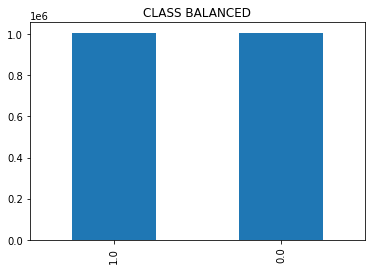

In [72]:
upsampled.ArrDel15.value_counts().plot(kind='bar', title='CLASS BALANCED');


In [73]:
upsampled

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDel15
874018,3,2016,9,14,1319.0,0.0,1300,0.0,12889,12892,1400,16,257,116,0.0,10,1018,38,60,18,71,69,75,0.0
97137,4,2016,10,27,1451.0,0.0,1500,0.0,14747,14107,1700,6,217,113,0.0,10,1011,36,47,6,94,94,18,0.0
1009470,4,2017,10,16,2035.0,0.0,2000,0.0,11298,10397,2300,16,119,116,0.0,10,1022,12,45,18,58,56,63,0.0
1357385,2,2017,4,1,1002.0,0.0,1000,0.0,12266,11292,1100,11,41,326,1.0,7,1022,100,31,13,35,30,88,0.0
353856,1,2016,2,2,135.0,0.0,100,0.0,14107,13930,600,14,69,122,0.0,7,1020,100,30,23,31,23,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965761,1,2017,1,4,1251.0,1.0,1100,66.0,12889,12892,1200,5,131,176,0.0,10,1020,100,51,6,58,57,79,1.0
406512,1,2016,3,3,2313.0,1.0,2200,27.0,14771,10397,600,7,71,116,0.0,10,1021,44,34,13,40,36,82,1.0
81750,4,2016,10,19,1437.0,1.0,1300,52.0,14771,14107,1600,6,317,113,0.0,10,1012,0,37,8,89,91,19,1.0
271502,4,2016,12,8,1158.0,0.0,1100,13.0,12889,12892,1200,5,189,113,0.0,10,1024,2,53,5,64,62,70,1.0


In [0]:
y_train = upsampled.ArrDel15
x_train = upsampled.drop(['ArrDel15'], axis=1)

In [75]:
y_train.value_counts()

1.0    1005148
0.0    1005148
Name: ArrDel15, dtype: int64

**Decision Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred2 = clf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    430915
         1.0       0.70      0.70      0.70    113707

    accuracy                           0.87    544622
   macro avg       0.81      0.81      0.81    544622
weighted avg       0.87      0.87      0.87    544622



**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


In [0]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    430915
         1.0       0.81      0.72      0.76    113707

    accuracy                           0.91    544622
   macro avg       0.87      0.84      0.85    544622
weighted avg       0.90      0.91      0.90    544622



**EXTRA-TREES Classifier**

In [76]:

from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_jobs=-1,random_state =None)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [87]:
X_test

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
707033,3,2016,7,28,1526.0,1.0,1400,66.0,12892,13930,2000,20,9,176,0.1,10,1013,100,66,27,73,73,79
1384272,2,2017,4,28,2326.0,0.0,2300,0.0,10397,13204,100,5,177,116,0.0,10,1016,89,67,16,76,77,74
305177,1,2016,2,17,1804.0,0.0,1800,0.0,12478,11292,2100,18,204,113,0.0,10,1009,18,28,23,47,48,84
1124729,4,2017,11,4,1355.0,0.0,1400,0.0,11618,14771,1700,18,284,116,0.0,10,1017,32,41,20,54,52,61
553906,2,2016,5,12,1733.0,0.0,1700,0.0,12266,12889,1900,3,248,113,0.0,10,1013,0,31,4,91,89,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197967,4,2016,11,21,1458.0,0.0,1500,0.0,14107,12889,1500,12,243,113,0.0,10,1011,8,42,13,60,58,55
1733188,3,2017,8,31,1300.0,0.0,1300,0.0,10397,11292,1400,6,61,113,0.0,20,1013,0,46,7,87,87,23
522636,2,2016,5,19,852.0,0.0,900,0.0,11618,13204,1200,11,215,176,0.1,9,1017,43,72,13,85,83,68
959045,1,2017,1,16,1226.0,0.0,1200,0.0,14771,12892,1400,5,223,113,0.0,10,1018,1,58,6,67,66,75


In [0]:
X_test=X_test.drop(['ArrDelayMinutes'],axis=1)
# X=X.drop(['ArrDelayMinutes'],axis=1)


In [86]:
x_train

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
874018,3,2016,9,14,1319.0,0.0,1300,0.0,12889,12892,1400,16,257,116,0.0,10,1018,38,60,18,71,69,75
97137,4,2016,10,27,1451.0,0.0,1500,0.0,14747,14107,1700,6,217,113,0.0,10,1011,36,47,6,94,94,18
1009470,4,2017,10,16,2035.0,0.0,2000,0.0,11298,10397,2300,16,119,116,0.0,10,1022,12,45,18,58,56,63
1357385,2,2017,4,1,1002.0,0.0,1000,0.0,12266,11292,1100,11,41,326,1.0,7,1022,100,31,13,35,30,88
353856,1,2016,2,2,135.0,0.0,100,0.0,14107,13930,600,14,69,122,0.0,7,1020,100,30,23,31,23,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965761,1,2017,1,4,1251.0,1.0,1100,66.0,12889,12892,1200,5,131,176,0.0,10,1020,100,51,6,58,57,79
406512,1,2016,3,3,2313.0,1.0,2200,27.0,14771,10397,600,7,71,116,0.0,10,1021,44,34,13,40,36,82
81750,4,2016,10,19,1437.0,1.0,1300,52.0,14771,14107,1600,6,317,113,0.0,10,1012,0,37,8,89,91,19
271502,4,2016,12,8,1158.0,0.0,1100,13.0,12889,12892,1200,5,189,113,0.0,10,1024,2,53,5,64,62,70


In [0]:
Y_predetc=etc.predict(X_test)

In [89]:
target_names=["Class 0","Class 1"]
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_predetc,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94    430891
     Class 1       0.80      0.74      0.77    113731

    accuracy                           0.91    544622
   macro avg       0.87      0.84      0.85    544622
weighted avg       0.90      0.91      0.91    544622



In [90]:
Y_predetc
xtdf=pd.DataFrame(Y_predetc)
xtdf[0]
X_test["ArrDelayMinutes"]=dfmerge["ArrDelayMinutes"]
X_test

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDelayMinutes
707033,3,2016,7,28,1526.0,1.0,1400,66.0,12892,13930,2000,20,9,176,0.1,10,1013,100,66,27,73,73,79,65.0
1384272,2,2017,4,28,2326.0,0.0,2300,0.0,10397,13204,100,5,177,116,0.0,10,1016,89,67,16,76,77,74,0.0
305177,1,2016,2,17,1804.0,0.0,1800,0.0,12478,11292,2100,18,204,113,0.0,10,1009,18,28,23,47,48,84,0.0
1124729,4,2017,11,4,1355.0,0.0,1400,0.0,11618,14771,1700,18,284,116,0.0,10,1017,32,41,20,54,52,61,0.0
553906,2,2016,5,12,1733.0,0.0,1700,0.0,12266,12889,1900,3,248,113,0.0,10,1013,0,31,4,91,89,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197967,4,2016,11,21,1458.0,0.0,1500,0.0,14107,12889,1500,12,243,113,0.0,10,1011,8,42,13,60,58,55,6.0
1733188,3,2017,8,31,1300.0,0.0,1300,0.0,10397,11292,1400,6,61,113,0.0,20,1013,0,46,7,87,87,23,0.0
522636,2,2016,5,19,852.0,0.0,900,0.0,11618,13204,1200,11,215,176,0.1,9,1017,43,72,13,85,83,68,0.0
959045,1,2017,1,16,1226.0,0.0,1200,0.0,14771,12892,1400,5,223,113,0.0,10,1018,1,58,6,67,66,75,0.0


In [0]:
import collections

classified_df = pd.DataFrame(X_test)

classified_df['Arrdel15']=Y_predetc

In [0]:
classified_df
classified_df.to_csv("pipelinefinal.csv")

In [0]:
#X_test=X_test.drop(["ArrDelayMinutes","Arrdel15"],axis=1)


**LOGISTIC REGRESSION**

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_predlog=logreg.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,y_predlog,target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.93    430915
     Class 1       0.74      0.78      0.76    113707

    accuracy                           0.90    544622
   macro avg       0.84      0.85      0.85    544622
weighted avg       0.90      0.90      0.90    544622



**XGBOOST**

In [0]:
import xgboost 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
X_test_np = X_test.values
y_predxgb=model.predict(X_test)
from sklearn.metrics import classification_report

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,y_predxgb,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93    430915
     Class 1       0.73      0.79      0.76    113707

    accuracy                           0.90    544622
   macro avg       0.84      0.86      0.85    544622
weighted avg       0.90      0.90      0.90    544622



In [27]:
X_test

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDelayMinutes,Arrdel15
753119,3,2016,7,19,1413.0,0.0,1400,0.0,12889,11298,1900,15,153,113,0.0,10,1018,0,68,17,93,94,35,0.0,0.0
1111932,4,2017,11,1,1708.0,0.0,1700,0.0,11618,11057,1900,7,188,116,0.0,10,1020,63,47,12,67,67,48,0.0,0.0
395088,1,2016,3,11,1616.0,1.0,1200,206.0,12266,14771,1500,9,118,389,5.5,6,1008,100,55,12,59,57,90,201.0,1.0
1785846,3,2017,9,15,1859.0,0.0,1900,0.0,14771,12889,2000,6,240,113,0.0,10,1006,37,44,8,79,79,29,0.0,0.0
1002969,4,2017,10,19,1857.0,1.0,1700,92.0,14771,12889,1900,18,216,113,0.0,10,1005,0,27,24,75,75,17,79.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676783,2,2016,6,1,16.0,0.0,0,0.0,12889,12266,500,3,98,248,0.0,0,1013,100,72,6,73,73,99,0.0,0.0
318716,1,2016,2,16,809.0,0.0,800,0.0,12889,10397,1500,17,209,116,0.1,10,1012,50,42,20,55,51,66,0.0,0.0
641285,2,2016,6,5,1556.0,1.0,1500,26.0,13930,14107,1700,14,277,113,0.0,10,1004,0,20,16,111,111,4,18.0,1.0
26106,1,2016,1,14,1041.0,0.0,1000,0.0,13930,14107,1300,3,165,113,0.0,10,1019,0,33,4,58,57,42,0.0,0.0


**PIPELINE**

In [96]:
df3 = pd.read_csv("/content/gdrive/My Drive/pipelinefinal.csv",index_col=0)
df3

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDelayMinutes,Arrdel15
707033,3,2016,7,28,1526.0,1.0,1400,66.0,12892,13930,2000,20,9,176,0.1,10,1013,100,66,27,73,73,79,65.0,1.0
1384272,2,2017,4,28,2326.0,0.0,2300,0.0,10397,13204,100,5,177,116,0.0,10,1016,89,67,16,76,77,74,0.0,0.0
305177,1,2016,2,17,1804.0,0.0,1800,0.0,12478,11292,2100,18,204,113,0.0,10,1009,18,28,23,47,48,84,0.0,0.0
1124729,4,2017,11,4,1355.0,0.0,1400,0.0,11618,14771,1700,18,284,116,0.0,10,1017,32,41,20,54,52,61,0.0,0.0
553906,2,2016,5,12,1733.0,0.0,1700,0.0,12266,12889,1900,3,248,113,0.0,10,1013,0,31,4,91,89,13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197967,4,2016,11,21,1458.0,0.0,1500,0.0,14107,12889,1500,12,243,113,0.0,10,1011,8,42,13,60,58,55,6.0,0.0
1733188,3,2017,8,31,1300.0,0.0,1300,0.0,10397,11292,1400,6,61,113,0.0,20,1013,0,46,7,87,87,23,0.0,0.0
522636,2,2016,5,19,852.0,0.0,900,0.0,11618,13204,1200,11,215,176,0.1,9,1017,43,72,13,85,83,68,0.0,0.0
959045,1,2017,1,16,1226.0,0.0,1200,0.0,14771,12892,1400,5,223,113,0.0,10,1018,1,58,6,67,66,75,0.0,0.0


In [97]:
X3=df3.loc[df3['Arrdel15'] == 1.0]      #selecting only delayed flights 
X3.shape

(104257, 25)

In [98]:
Y3 = X3['ArrDelayMinutes']
Y3

707033      65.0
960381     115.0
556488      27.0
938374      53.0
1486357     78.0
           ...  
1024604    347.0
104139       0.0
985253      49.0
1318004     20.0
1718693    126.0
Name: ArrDelayMinutes, Length: 104257, dtype: float64

In [0]:
X3=X3.drop(['ArrDelayMinutes','Arrdel15'],axis = 1)

In [0]:
Y_predetr = etr.predict(X3)

In [103]:
Y_predetr

array([ 68.44,  94.99,  23.  , ...,  85.4 ,  34.95, 120.24])

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("RMSE  " , np.sqrt(mean_squared_error(Y3, Y_predetr)))
print("MAE   " , mean_absolute_error(Y3, Y_predetr))
print("R2    " , r2_score(Y3,Y_predetr))

RMSE   19.31980385991607
MAE    14.629212618816961
R2     0.9348840619922802


In [105]:
preddfe = pd.DataFrame({'Actual': Y3, 'Predicted': Y_predetr})
preddfe

,Actual,Predicted
707033,65.0,68.44
960381,115.0,94.99
556488,27.0,23.00
938374,53.0,58.41
1486357,78.0,95.46
...,...,...
1024604,347.0,310.30
104139,0.0,17.05
985253,49.0,85.40
1318004,20.0,34.95
